## Estimating the Risk of a Portfolio - Value At Risk 
###### Author : E. Delali Aggor

###### Introduction
Value at Risk (VAR) is a fairly simple but valuable risk measure that provides enables investors/traders understand the risk of loss for their investments. VaR allows financial professionals to estimate how much an investment could lose over a given period of time (for example, over a day or a month) under normal market conditions.


VaR can be calculated at different levels. It can also be used to estimate the risk of a single security or a portfolio of securities. Most commercial banks and investment firms use VaR as an estimate to understand the potential losses of their portfolios.

From a statistical point of view, confidence level is an important parameter for calculating VaR. VaR quantifies with a certain degree of confidence the maximum potential losses of a security or portfolio over period. For instance, the 95% confidence of a portfolio has VAR of 100.000 EUR in a day. This implies that there is a 95% confidence that the portfolio will not lose more than 100.000 EUR within a day.


#### Interpreting VaR

A daily VaR of 6.5% with 95% confidence implies that:
- there is a 5% condfidence that your portfolio will lose 6.5% in a day.
- or we have 95% confidence that our portfolio will lose 6.5% or more in a day.

Similarly:
"We have a portfolio VaR of 50,000 euros over the next month at 95% confidence"
This means that, with 95% confidence, we can say that the portfolio's loss will not exceed 50,000 euros in a month.

#### Estimating VaR
As a standard risk metric, various models have been put forward for estimating Var. The main categories are: 

-  Parametric VaR : This method first identities the portfolio returns (average or expected value, standard deviation) and their distribution before the VaR estimation. Some methods in the parametric category are the variance-covariance (VC) method and many GARCH variant methods, such as the Risk Metrics model.


-  Monte Carlo Simulation : This method makes certain assumptions about the distribution of returns. The most important semi-parametric method is the Monte Carlo simulation. This method generates random scenarios for future portfolio returns with a distribution based on certain non-linear pricing models.


-  Non-Parametric: With this method, it is not necessary to make assumptions about the distribution of returns. The main example of this method is the Historical Simulation, in which the empirical distribution of past portfolio returns is used to estimate VaR.

In this work, we focus on the first method. 

#### Assumptions
We note the following assumptions about the standard VaR calculation:

- Normal distribution of returns - VaR assumes that the portfolio return is normally distributed. This isn't realistic for most resources, but it allows us to develop a baseline with a much simpler calculation. NB: It is possible to make changes to the VaR to take into account different distributions.


- Standard market conditions - VaR is best used to account for losses in standard markets and is not suitable for extremes / outliers just like many financial instruments.

### Exploratory Data Analysis

In [1]:
#import required packages

import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
import seaborn as sns
sns.set()

# set plotting parameters
%matplotlib inline
#sns.set_style("whitegrid")
plt.rc("figure", figsize=(10,6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

#### The Data
- We download historical market data from yahoo finance for BASF (BAS.DE), Deutsche Bank (DB1.DE), Deutsche Telecom (DTE.DE) and Simens (SIE.DE). The dataset consists of daily market data such as open, high, low and close prices ranging from 2021-01-01 to 2021-12-31.

In [2]:
#load historical data from yahoo finance and view the first 3 rows

tickers = ['BAS.DE','DB1.DE','DTE.DE','SIE.DE']
Data = wb.DataReader(tickers, data_source='yahoo', start='2019-1-1', end = '2022-12-31') 
Data.head(3)

Attributes  Adj Close                                       Close              \
Symbols        BAS.DE     DB1.DE     DTE.DE     SIE.DE     BAS.DE      DB1.DE   
Date                                                                            
2019-01-02  45.026714  97.468483  12.013848  86.310394  60.720001  105.949997   
2019-01-03  44.507629  96.548538  12.103021  83.995995  60.020000  104.949997   
2019-01-04  46.858326  98.894402  12.196246  87.287193  63.189999  107.500000   

Attributes                          High              ...     Low             \
Symbols     DTE.DE     SIE.DE     BAS.DE      DB1.DE  ...  DTE.DE     SIE.DE   
Date                                                  ...                      
2019-01-02  14.820  98.080002  60.910000  106.050003  ...  14.610  95.650002   
2019-01-03  14.930  95.449997  60.700001  105.750000  ...  14.745  95.070000   
2019-01-04  15.045  99.190002  63.299999  107.500000  ...  14.910  96.160004   

Attributes       Open                                    Volume            \
Symbols        BAS.DE      DB1.DE  DTE.DE     SIE.DE     BAS.DE    DB1.DE   
Date                                                                        
2019-01-02  60.500000  104.699997  14.740  97.019997  2564044.0  526836.0   
2019-01-03  60.099998  105.050003  14.755  97.269997  2213589.0  415909.0   
2019-01-04  60.779999  106.650002  15.010  96.440002  4197991.0  578274.0   

Attributes                         
Symbols         DTE.DE     SIE.DE  
Date                               
2019-01-02   8351335.0  2195655.0  
2019-01-03  10370848.0  2582773.0  
2019-01-04  10704000.0  2722920.0  

[3 rows x 24 columns]

In [3]:
#General inforamtion about the data : This includes the row index, column names and the number of non-zero values.

Data.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 976 entries, 2019-01-02 to 2022-11-02
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Adj Close, BAS.DE)  976 non-null    float64
 1   (Adj Close, DB1.DE)  976 non-null    float64
 2   (Adj Close, DTE.DE)  976 non-null    float64
 3   (Adj Close, SIE.DE)  976 non-null    float64
 4   (Close, BAS.DE)      976 non-null    float64
 5   (Close, DB1.DE)      976 non-null    float64
 6   (Close, DTE.DE)      976 non-null    float64
 7   (Close, SIE.DE)      976 non-null    float64
 8   (High, BAS.DE)       976 non-null    float64
 9   (High, DB1.DE)       976 non-null    float64
 10  (High, DTE.DE)       976 non-null    float64
 11  (High, SIE.DE)       976 non-null    float64
 12  (Low, BAS.DE)        976 non-null    float64
 13  (Low, DB1.DE)        976 non-null    float64
 14  (Low, DTE.DE)        976 non-null    float64
 15  (Low, SIE.DE)        

- In this work, we will use only the adjusted close prices. 


- The stock's closing price is modified by the adjusted closing price to reflect the stock's worth following any corporate actions such as dividends paid to stock owners and other changes such to stock price such as stock splits etc. 


- When analyzing historical returns or performing a thorough analysis of past performance, it is frequently used.


- Below, we plot the daily prices of our portfolio.The daily price of each stock maybe, hence we make a second plot for log prices.

               BAS.DE      DB1.DE     DTE.DE      SIE.DE
Date                                                    
2022-01-03  58.359173  144.331299  15.943093  149.470078
2022-01-04  60.905037  143.693970  15.927678  151.123077
2022-01-05  61.389969  144.135193  15.869863  153.592850
               BAS.DE      DB1.DE  DTE.DE      SIE.DE
Date                                                 
2022-10-31  45.435001  164.649994  19.164  110.639999
2022-11-01  45.494999  162.050003  19.350  112.300003
2022-11-02  45.055000  162.149994  19.500  110.320000


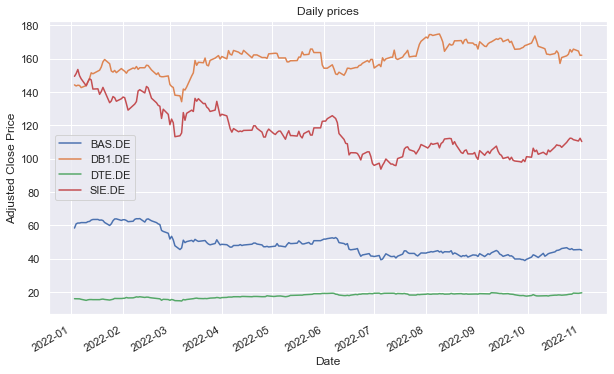

In [4]:
#load historical data from yahoo finance for adjusted closing price
#view first and last 3 columns
#plot adjusted closing price

tickers = ['BAS.DE','DB1.DE','DTE.DE','SIE.DE']
price = pd.DataFrame()
for t in tickers:
    price[t] = wb.DataReader(t, data_source='yahoo', start='2022-1-1', end = '2022-12-31')['Adj Close']  
print(price.head(3))
print(price.tail(3))

price.plot()
plt.title('Daily prices')
plt.ylabel('Adjusted Close Price')
plt.show()

###### Log Returns
- We calculate the daily returns of our portfolio. The log returns formula is given by:
$$
ln(\frac{P_t}{P_{t-1}})
$$
-As we can see from the graph below, our time series has a stable trend and now they are moving around zero. The sharpe of the distribution is clearly seen in the second graph. This further implies that our returns data is normally distributed and have a stable mean. We can conclude then that, our time series are now closer to stationarity and we can use them for our analysis. 

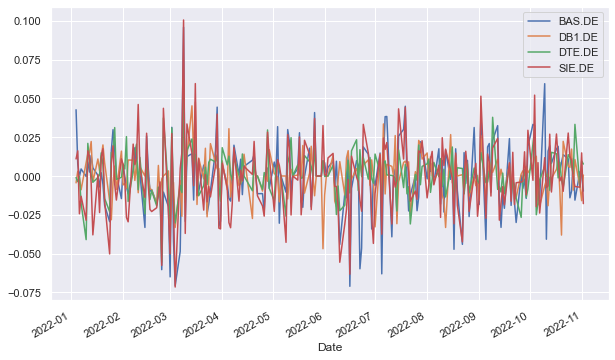

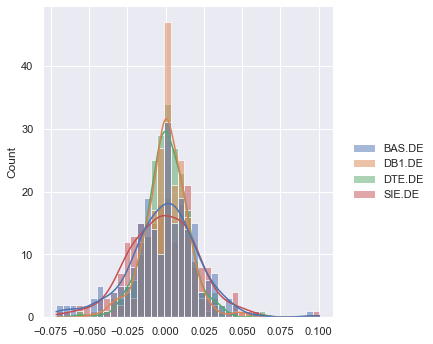

In [5]:
returns = np.log( price / price.shift(1))    #or returns = Data.pct_change()

returns.plot()
plt.show()

sns.displot(returns, kde=True)
#plt.xlabel("Daily returns")
#plt.ylabel("Frequency")

#### Summary Statistics
We observe the following statistics from the daily returns which are normalized to 100 and rounded to 2 decimal places.

In [6]:
summary = (returns*100).describe()
summary.round(2)[1:]

,BAS.DE,DB1.DE,DTE.DE,SIE.DE
mean,-0.12,0.05,0.09,-0.14
std,2.31,1.42,1.43,2.31
min,-7.11,-4.69,-5.55,-7.16
25%,-1.40,-0.66,-0.70,-1.65
50%,0.00,0.00,0.00,-0.14
75%,1.28,0.92,0.91,1.33
max,9.59,5.51,6.20,10.06


#### The Variance-Covariance Matrix
We find the variance-covariance matrix of the returns. Diagonal entries represnts the variance whiles off-diagonal represents the covariance between the companies.

\begin{eqnarray*}
Covariance Matrix: \  \   
\Sigma = \begin{bmatrix}
        \sigma_{1}^2 \ \sigma_{12} \ \dots \ \sigma_{1I} \\
        \sigma_{21} \ \sigma_{2}^2 \ \dots \ \sigma_{2I} \\
        \vdots \ \vdots \ \ddots \ \vdots \\
        \sigma_{I1} \ \sigma_{I2} \ \dots \ \sigma_{I}^2
    \end{bmatrix}
\end{eqnarray*}

In [7]:
cov_matrix = returns.cov()
cov_matrix

,BAS.DE,DB1.DE,DTE.DE,SIE.DE
BAS.DE,0.000535,0.000083,0.000159,0.000397
DB1.DE,0.000083,0.000201,0.000068,0.000099
DTE.DE,0.000159,0.000068,0.000204,0.000185
SIE.DE,0.000397,0.000099,0.000185,0.000531


#### Portfolio Expected Return (Mean) and Portfolio Risk (Standard Deviation) 
Here, we compute the expected return of each stock and volatility of the portfolio under consideration.

In [8]:
#Expected return of each stock 

avgerage_returns = returns.mean()               
print(avgerage_returns)

BAS.DE   -0.001203
DB1.DE    0.000541
DTE.DE    0.000937
SIE.DE   -0.001413
dtype: float64


In [9]:
#daily count of return

count = returns.count()[0]                   
count  

215

In [10]:
#portfolio mean and standard deviation

weights = np.array([0.5, 0.5, 0.5, 0.5])                        #equal weighted portfolio
portfolio_mean =  avgerage_returns @ weights                    #expected daily return of our portfolio
portfolio_std  =  np.sqrt(weights.T @ cov_matrix @ weights)     #pfolio_vol
print(portfolio_mean)
print(portfolio_std)

-0.0005689403842091285
0.029377620610722834


#### Normal Distribution
- Based on the portfolio mean and portfolio standard deviation, we obtain a normal distribution. 

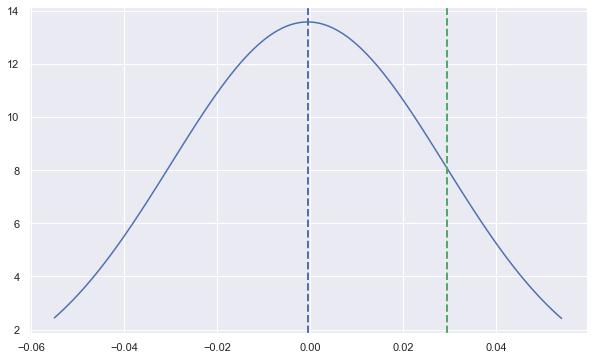

In [11]:
#plot the portfolio mean and portfolio std on a normal dist.

x=np.arange(-0.055,0.055,0.001)                      #x-axis
norm_dist = norm.pdf(x,portfolio_mean,portfolio_std) 

plt.plot(x,norm_dist,color='b')
plt.axvline(portfolio_mean,color='b',linestyle='dashed',linewidth=2)
plt.axvline(portfolio_std,color='g',linestyle='dashed',linewidth=2)
plt.show()

### VaR

We compute VaR by considering a confidence level of  0.05. If I run the code below, we observe that the VaR is equal to -4.99%. This implies that, I have 95 confidence that my portfolio will not lose more than 4.99% in a day.    

In [12]:
confidence_level = 0.05
VaR=norm.ppf(confidence_level,portfolio_mean,portfolio_std)
print(VaR)
Var_per = print (str(round(VaR, 4) * 100) + ' %')
print(Var_per)

-0.048890826196960925
-4.89 %
None


### VaR for specified Days

- Suppose we consider 5 days and run the code below, we observe that in 5 days, the portfolio will not lose 8.64% of its value. 

In [13]:
num_days = 3
VaR_5d = VaR*np.sqrt(num_days)
print(VaR_5d)
VaR_per = print (str(round(VaR_5d, 4) * 100) + ' %')

-0.08468139499715578
-8.469999999999999 %


### The confidence interval

Formula:
$$ C.L = \bar{x} - Z_{\frac{\sigma}{2}}.\frac{\sigma}{\sqrt{n}}
$$

Considering a confidence  level of 95%. On this value, the value of Z is equal to 2 given the formula for confidence interval. 
The value of Z at 95% confidence is equal to 2.

- NB: For different confidence levels, you'll have to refer to the Z-table which can be available on google or any other platform as well. 

So here, I'll be using Z=2 and then $\sigma$ is the portfolio risk which is standard deviation of the portfolio, $\bar{x}$ this is portfolio mean and $n$ represents the count if you remember the 207 number. We run the following codes for the confidence interval and plot these intervals on a normal distribution.

In [14]:
CL_lower =portfolio_mean - 2*portfolio_std/np.sqrt(count)
CL_upper =portfolio_mean + 2*portfolio_std/np.sqrt(count)
print(CL_lower)
print(CL_upper)

-0.004576014576933946
0.0034381338085156888


## Conclusion

From the above calculations, we obtained a -4.92% VaR for our porfolio with 4 different stocks with a 5% confidence level. This implies that, in one-day, the portfolio would not lose more than 4.92% of it's value. With the portfolio mean and standarded deviation, we derived the confidence interval of our portfolio.